<h1>Análisis de datos de Educación</h1>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder as LE

In [2]:
data = pd.read_csv('Datos\Educacion.csv', delimiter=';', decimal=',')

In [3]:
data.shape

(291757, 13)

In [4]:
data.describe()

,Código Departamento,Código Entidad,Dato Numérico,Dato Cualitativo,Año,Mes
count,291756.000000,291756.000000,269714.000000,0.0,291756.000000,291756.000000
mean,37.739323,38155.073130,70.401236,NaN,2012.710793,11.976569
std,26.066257,26037.440008,37.412044,NaN,4.675819,0.151267
min,1.000000,1001.000000,0.000000,NaN,2003.000000,11.000000
25%,15.000000,15673.000000,46.400000,NaN,2009.000000,12.000000
50%,25.000000,25807.000000,73.300000,NaN,2013.000000,12.000000
75%,66.000000,66001.000000,95.190000,NaN,2017.000000,12.000000
max,99.000000,99773.000000,971.920000,NaN,2020.000000,12.000000


In [5]:
data.head()

,Código Departamento,Departamento,Código Entidad,Entidad,Dimensión,Subcategoría,Indicador,Dato Numérico,Dato Cualitativo,Año,Mes,Fuente,Unidad de Medida
0,NaN,NaN,NaN,NaN,NaN,NaN,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,NaN,NaN,NaN,NaN,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,NaN
1,20.0,Cesar,20000.0,Cesar,Educación,Acceso a la educación,Cobertura bruta en transición,122.39,NaN,2005.0,12.0,Ministerio de Educación Nacional,Porcentaje (el valor está multiplicado por 100)
2,20.0,Cesar,20001.0,Valledupar,Educación,Acceso a la educación,Cobertura bruta en transición,98.26,NaN,2005.0,12.0,Ministerio de Educación Nacional,Porcentaje (el valor está multiplicado por 100)
3,20.0,Cesar,20011.0,Aguachica,Educación,Acceso a la educación,Cobertura bruta en transición,107.07,NaN,2005.0,12.0,Ministerio de Educación Nacional,Porcentaje (el valor está multiplicado por 100)
4,20.0,Cesar,20013.0,Agustín Codazzi,Educación,Acceso a la educación,Cobertura bruta en transición,120.82,NaN,2005.0,12.0,Ministerio de Educación Nacional,Porcentaje (el valor está multiplicado por 100)


In [6]:
data.dtypes

Código Departamento    float64
Departamento            object
Código Entidad         float64
Entidad                 object
Dimensión               object
Subcategoría            object
Indicador               object
Dato Numérico          float64
Dato Cualitativo       float64
Año                    float64
Mes                    float64
Fuente                  object
Unidad de Medida        object
dtype: object

In [7]:
data.isnull().mean()

Código Departamento    0.000003
Departamento           0.000003
Código Entidad         0.000003
Entidad                0.000003
Dimensión              0.000003
Subcategoría           0.000003
Indicador              0.000000
Dato Numérico          0.075553
Dato Cualitativo       1.000000
Año                    0.000003
Mes                    0.000003
Fuente                 0.000000
Unidad de Medida       0.000003
dtype: float64

In [8]:
data = data.drop(data.index[0])

In [9]:
data = data.drop('Dato Cualitativo', axis=1)

In [10]:
data = data.dropna(how='any', axis=0)

In [11]:
data.isnull().mean()

Código Departamento    0.0
Departamento           0.0
Código Entidad         0.0
Entidad                0.0
Dimensión              0.0
Subcategoría           0.0
Indicador              0.0
Dato Numérico          0.0
Año                    0.0
Mes                    0.0
Fuente                 0.0
Unidad de Medida       0.0
dtype: float64

In [12]:
data.shape

(269714, 12)

In [13]:
data.describe()

,Código Departamento,Código Entidad,Dato Numérico,Año,Mes
count,269714.000000,269714.000000,269714.000000,269714.000000,269714.000000
mean,37.549211,37963.749542,70.401236,2013.157322,11.974669
std,26.084565,26055.578439,37.412044,4.520340,0.157127
min,1.000000,1001.000000,0.000000,2003.000000,11.000000
25%,15.000000,15646.000000,46.400000,2009.000000,12.000000
50%,25.000000,25781.000000,73.300000,2013.000000,12.000000
75%,63.000000,63690.000000,95.190000,2017.000000,12.000000
max,99.000000,99773.000000,971.920000,2020.000000,12.000000


In [14]:
le = LE()
le.fit(data['Subcategoría'])
data['Subcategoría'] = le.transform(data['Subcategoría'])
SUBCAT_MAP = dict(zip(le.classes_, le.transform(le.classes_)))
print(SUBCAT_MAP)

{'Acceso a la educación': 0, 'Acceso a la educación desagregado por sexo': 1, 'Calidad': 2, 'Logro': 3, 'Permanencia y rezago': 4}


In [15]:
le = LE()
le.fit(data['Unidad de Medida'])
data['Unidad de Medida'] = le.transform(data['Unidad de Medida'])
UNIDAD_MAP = dict(zip(le.classes_, le.transform(le.classes_)))
print(UNIDAD_MAP)

{'Años de educación': 0, 'Porcentaje': 1, 'Porcentaje (el valor está multiplicado por 100)': 2, 'Puntos': 3}


In [16]:
le = LE()
le.fit(data['Indicador'])
data['Indicador'] = le.transform(data['Indicador'])
INDICADOR_MAP = dict(zip(le.classes_, le.transform(le.classes_)))
print(INDICADOR_MAP)

{'Años de educación personas de 15 y más años': 0, 'Cobertura bruta en educación - Total': 1, 'Cobertura bruta en educación básica': 2, 'Cobertura bruta en educación media': 3, 'Cobertura bruta en educación primaria': 4, 'Cobertura bruta en educación secundaria': 5, 'Cobertura bruta en transición': 6, 'Cobertura en educación superior': 7, 'Cobertura neta en educación - Total': 8, 'Cobertura neta en educación básica': 9, 'Cobertura neta en educación básica  - Hombres': 10, 'Cobertura neta en educación básica  - Mujeres': 11, 'Cobertura neta en educación media': 12, 'Cobertura neta en educación primaria': 13, 'Cobertura neta en educación secundaria': 14, 'Cobertura neta en educación total - Hombres': 15, 'Cobertura neta en educación total - Mujeres': 16, 'Cobertura neta en transición': 17, 'Porcentaje de asistencia de 5 a 24 años (Censo)': 18, 'Porcentaje de asistencia de 5 a 24 años Rural (Censo)': 19, 'Porcentaje de asistencia de 5 a 24 años Urbana (Censo)': 20, 'Puntaje promedio Prueb

In [17]:
data['educacion_key'] = range(1, len(data) + 1)

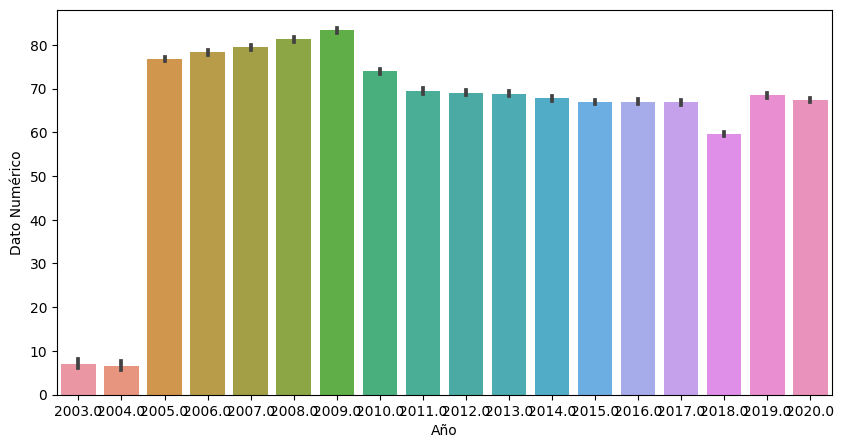

In [18]:
# plot bar data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.barplot(x='Año', y='Dato Numérico', data=data)
plt.show()

In [19]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
  
# apply normalization techniques
column = 'Dato Numérico'
data[column] = MinMaxScaler().fit_transform(np.array(data[column]).reshape(-1,1))

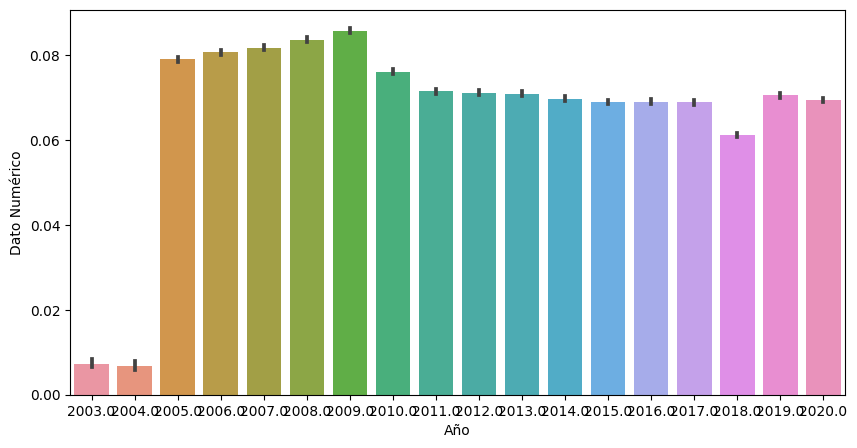

In [20]:
plt.figure(figsize=(10,5))
sns.barplot(x='Año', y='Dato Numérico', data=data)
plt.show()

In [21]:
data.to_csv('Datos/Salud_limpio.csv', index=False, decimal='.', sep=';')